In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# reading images 
img=cv.imread('cat.jpg')
cv.imshow('cat',img)
cv.waitKey(0)

-1

In [ ]:
# playing videos
capture = cv.VideoCapture('dog.mp4')
while True:
    isTrue, frame = capture.read()
    cv.imshow('dog',frame)
    if cv.waitKey(20) & 0xFF==ord('d'):
        break
capture.release()
cv.destroyAllWindows()

In [4]:
# rescaling
# img=cv.imread('cat.jpg')
# cv.imshow('cat',img)
def rescaleFrame(frame,scale=0.75):
    width=int(frame.shape[1]*scale)
    height=int(frame.shape[1]*scale)
    dimensions=(width,height)
    return cv.resize(frame,dimensions,interpolation=cv.INTER_AREA)
resized_image=rescaleFrame(img)
cv.imshow('image',resized_image)
cv.waitKey(0)

-1

In [ ]:
capture = cv.VideoCapture('dog.mp4')
while True:
    isTrue, frame = capture.read()
    frame_resized=rescaleFrame(frame)
    cv.imshow('dog',frame)
    cv.imshow('dog resized',frame_resized)
    
    if cv.waitKey(20) & 0xFF==ord('d'):
        break
capture.release()
cv.destroyAllWindows()

In [ ]:
# works only on live videos 
def changeRes(width,height):
    capture.set(3,width)
    capture.set(4,height)

In [ ]:
# drawing
blank=np.zeros((500,500,3),dtype='uint8')
cv.imshow('blank',blank)
# paint image with certain color
blank[:]=0,255,0
cv.imshow('green',blank)
cv.waitKey(0)

In [4]:
blank=np.zeros((500,500,3),dtype='uint8')
cv.imshow('blank',blank)
#paint image with certain color
blank[200:300,300:500]=0,255,0
cv.imshow('green',blank)
cv.waitKey(0)

-1

In [5]:
# draw a rectangle
cv.rectangle(blank,(0,0),(250,250),(0,250,0),thickness=2)
cv.imshow('rectangle',blank)

In [8]:
cv.rectangle(blank,(0,0),(250,250),(0,250,0),thickness=cv.FILLED)
cv.imshow('rectangle',blank)

In [5]:
cv.rectangle(blank,(0,0),(blank.shape[1]//2,blank.shape[0]//2),(0,250,0),thickness=cv.FILLED)
cv.imshow('rectangle',blank)

In [5]:
# draw circle 
cv.circle(blank,(blank.shape[1]//2,blank.shape[0]//2),40,(0,0,255),thickness=3)
cv.imshow('circle',blank)

In [11]:
# draw a line 
cv.line(blank,(0,0),(blank.shape[1]//2,blank.shape[0]//2),(255,255,255),thickness=2)
cv.imshow('line',blank)

In [13]:
# put text on image
cv.putText(blank,'hello',(255,255),cv.FONT_HERSHEY_TRIPLEX,1.0,(0,255,0),2)
cv.imshow('text',blank)

In [15]:
# converting to grayscale
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv.imshow('gray',gray)
cv.waitKey(0)

-1

In [16]:
# blur
blur=cv.GaussianBlur(img,(3,3),cv.BORDER_DEFAULT)
cv.imshow('blur',blur)

In [ ]:
blur=cv.GaussianBlur(img,(8,8),cv.BORDER_DEFAULT)
cv.imshow('blur',blur)

In [18]:
# edge cascade 
canny=cv.Canny(img,125,125)
cv.imshow('canny',canny)

In [25]:
canny=cv.Canny(blur,125,125)
cv.imshow('canny',canny)

In [27]:
# dilating an image 
dilated=cv.dilate(canny,(3,3),iterations=1)
cv.imshow('dilate',dilated)

In [ ]:
# erode 
eroded=cv.erode(dilated,(3,3),iterations=1)
cv.imshow('eroded',eroded)

In [ ]:
resized=cv.resize(img,(500,500))
cv.imshow('resized',resized)

In [ ]:
# cropping
cropped=img[50:200,200:400]
cv.imshow('cropped',cropped)

In [ ]:
# translation
#-x->left
#-y->up
#x->right
#y->down
def translate(img,x,y):
    transMat=np.float32([[1,0,x],[1,0,y]])
    dimensions=(img.shape[1],img.shape[0])
    return cv.warpAffine(img,transMat,dimensions)
translated=translate(img,100,100)
cv.imshow('translated',translated)

In [ ]:
# rotation
def rotate(img,angle,rotPoint):
    (height,weight)=img.shape[:2]
    if rotPoint is None:
        rotPoint=(width//2,height//2)
    rotMat=cv.getRotationMatrix2D(rotPoint,angle,1.0)
    dimensions=(width,height)
    return cv.warpAffine(img,rotMat,dimensions)
rotated=rotate(img,45)
cv.imshow('rotate',rotated)

In [ ]:
# flipping
flip=cv.flip(img,-1)
cv.imshow('flip',flip)

In [ ]:
# contour -> edges of the image
contours,heirarchies=cv.findContours(canny,cv.RETR_LIST,cv.CHAIN_AAPROX_NONE)
print(f'{len(contours)}contours found')

In [ ]:
contours,heirarchies=cv.findContours(canny,cv.RETR_TREE,cv.CHAIN_AAPROX_NONE)

In [ ]:
contours,heirarchies=cv.findContours(canny,cv.RETR_EXTERNAL,cv.CHAIN_AAPROX_NONE)

In [ ]:
contours,heirarchies=cv.findContours(canny,cv.RETR_LIST,cv.CHAIN_AAPROX_SIMPLE)

In [ ]:
ret,threshold=cv.threshold(gray,125,255cv.THRESH_BINARY)
cv.imshow('thres',thresh)
contours,heirarchies=cv.findContours(threshold,cv.RETR_LIST,cv.CHAIN_AAPROX_NONE)
print(f'{len(contours)}contours found')

In [ ]:
blank=np.zeros(img.shape,dtype='uint8')
cv.imshow('blank',blank)
cv.drawContours(blank,contours,-1,(0,0,255),2)
cv.imshow('contours drawn',blank)

In [3]:
# BGR to grayscale 
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv.imshow('gray',gray)

In [5]:
# BGR to HSV
hsv=cv.cvtColor(img,cv.COLOR_BGR2HSV)
cv.imshow('hsv',hsv)

In [ ]:
# BGR to L*a*b
lab=cv.cvtColor(img,cv.COLOR_BGR2LAB)
cv.imshow('lab',lab)

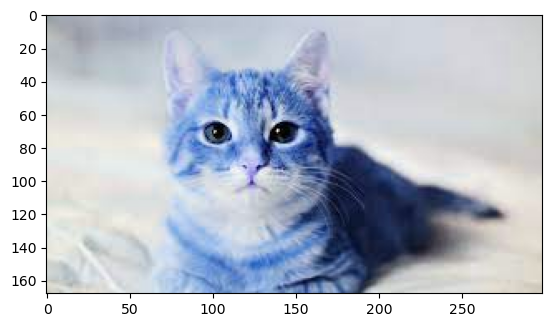

In [8]:
plt.imshow(img)
plt.show()

In [ ]:
rgb=cv.cvtColor(img,cv.COLOR_BGR2RGB)
cv.imshow('rgb',rgb)
# grayscale cannot be directly converted to hsv

In [11]:
b,g,r=cv.split(img)
cv.imshow('blue',b)
cv.imshow('green',g)
cv.imshow('red',r)
print(img.shape)
print(b.shape)
print(g.shape)
print(r.shape)

(168, 299, 3)
(168, 299)
(168, 299)
(168, 299)


In [ ]:
merged=cv.merge([b,g,r])
cv.imshow('merged image',merged)

In [14]:
blank=np.zeros(img.shape[:2],dtype='uint8')
blue=cv.merge([b,blank,blank])
green=cv.merge([blank,g,blank])
red=cv.merge([blank,blank,r])
cv.imshow('blue',blue)
cv.imshow('green',green)
cv.imshow('red',red)

In [ ]:
# average blur
average=cv.blur(img,(3,3))
cv.imshow('average blur',average)

In [ ]:
# guassian blur
gauss=cv.GaussianBlur(img,(7,7),0)
cv.imshow('gauss',gauss)

In [ ]:
# median blur
m=cv.medianBlur(img,3)
cv.imshow('median',m)

In [ ]:
# bilateral blur(most effective)
b=cv.bilateralFilter(img,5,35,25)
cv.imshow('bilateral',b)

In [16]:
# bitwise operations
blank=np.zeros((400,400),dtype='uint8')
rectangle=cv.rectangle(blank.copy(),(30,30),(370,370),255,-1)
circle=cv.circle(blank.copy(),(200,200),200,255,-1)
cv.imshow('rectangle',rectangle)
cv.imshow('circle',circle)

In [18]:
bitwise_and=cv.bitwise_and(rectangle,circle)
cv.imshow('and',bitwise_and)

In [20]:
bitwise_or=cv.bitwise_or(rectangle,circle)
cv.imshow('or',bitwise_or)

In [22]:
bitwise_xor=cv.bitwise_xor(rectangle,circle)
cv.imshow('xor',bitwise_xor)

In [ ]:
bitwise_not=cv.bitwise_not(rectangle)
cv.imshow('not',bitwise_not)

In [25]:
# masking 
blank=np.zeros(img.shape[:2],dtype='uint8')
mask=cv.circle(blank,(img.shape[1]//2,img.shape[0]//2),100,255,-1)
cv.imshow('mask',mask)

In [27]:
masked=cv.bitwise_and(img,img,mask=mask)
cv.imshow('masked',masked)

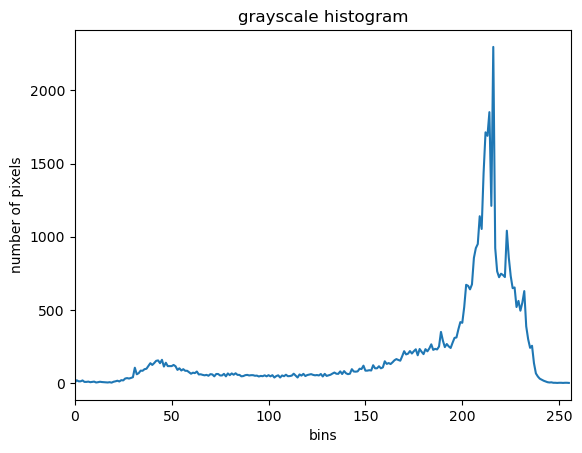

In [30]:
# histogram computation
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv.imshow('gray',gray)
gray_hist=cv.calcHist([gray],[0],None,[256],[0,256])
plt.figure()
plt.title('grayscale histogram')
plt.xlabel('bins')
plt.ylabel('number of pixels')
plt.plot(gray_hist)
plt.xlim([0,256])
plt.show()

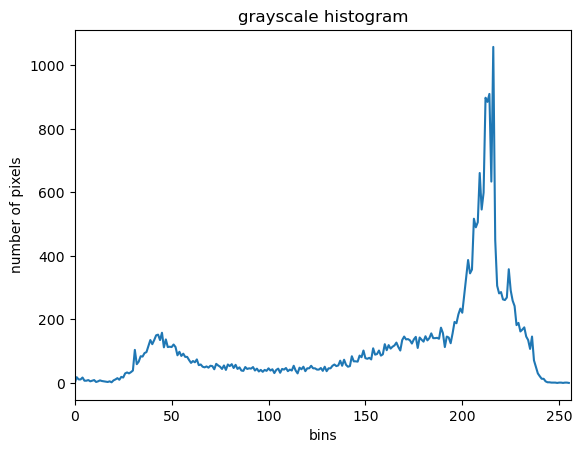

In [37]:
blank=np.zeros(img.shape[:2],dtype='uint8')
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv.imshow('gray',gray)
circle=cv.circle(blank,(img.shape[1]//2,img.shape[0]//2),100,256,-1)
mask=cv.bitwise_and(gray,gray,mask=circle)
cv.imshow('mask',mask)
gray_hist=cv.calcHist([gray],[0],mask,[256],[0,256])
plt.figure()
plt.title('grayscale histogram')
plt.xlabel('bins')
plt.ylabel('number of pixels')
plt.plot(gray_hist)
plt.xlim([0,256])
plt.show()

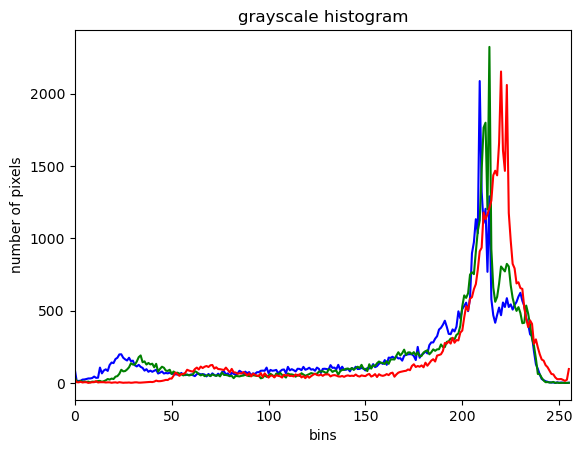

In [39]:
blank=np.zeros(img.shape[:2],dtype='uint8')
circle=cv.circle(blank,(img.shape[1]//2,img.shape[0]//2),100,256,-1)
mask=cv.bitwise_and(img,img,mask=circle)
cv.imshow('mask',mask)
plt.figure()
plt.title('grayscale histogram')
plt.xlabel('bins')
plt.ylabel('number of pixels')
colors=('b','g','r')
for i , col in enumerate(colors):
    hist=cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(hist,color=col)
    plt.xlim([0,256])
plt.show()

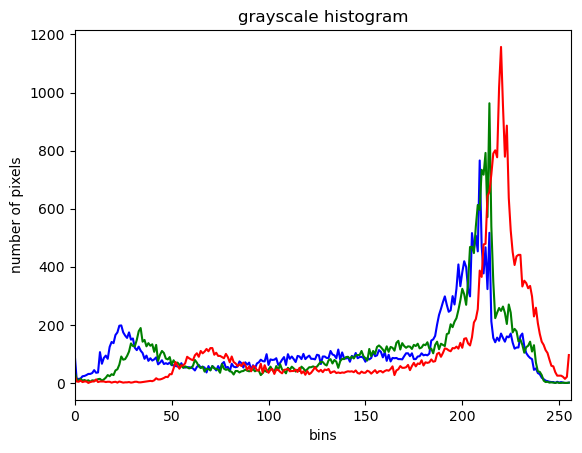

In [41]:
blank=np.zeros(img.shape[:2],dtype='uint8')
mask=cv.circle(blank,(img.shape[1]//2,img.shape[0]//2),100,256,-1)
masked=cv.bitwise_and(img,img,mask=mask)
cv.imshow('mask',masked)
plt.figure()
plt.title('grayscale histogram')
plt.xlabel('bins')
plt.ylabel('number of pixels')
colors=('b','g','r')
for i , col in enumerate(colors):
    hist=cv.calcHist([img],[i],mask,[256],[0,256])
    plt.plot(hist,color=col)
    plt.xlim([0,256])
plt.show()

In [ ]:
# thresholding->binarization
# simple thresholding 
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
threshold,thresh=cv.threshold(gray,150,255,cv.THRESH_BINARY)
cv.imshow('threshold',thresh)

In [ ]:
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
threshold,thresh_inv=cv.threshold(gray,150,255,cv.THRESH_BINARY_INV)
cv.imshow('threshold',thresh_inv)

In [ ]:
# adaptive thresholding
adaptive_thresh=cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,3)
cv.imshow('adaptive',adaptive_thresh)

In [ ]:
# laplacian
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
lap=cv.Laplacian(gray,cv.CV_64F)
lap=np.uint8(np.absolute(lap))
cv.imshow('laplacian',lap)

In [ ]:
# sobel
sobelx=cv.Sobel(gray,cv.CV_64F,1,0)
sobely=cv.Sobel(gray,cv.CV_64F,0,1)
cv.imshow('sobelx',sobelx)
cv.imshow('sobely',sobely)

In [ ]:
combined_sobel=cv.bitwise_or(sobelx,sobely)
cv.imshow('combined sobel',combined_sobel)                            

In [6]:
img=cv.imread('lady.jpg')
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv.imshow('gray person',gray)
haar_cascade=cv.CascadeClassifier('haar_face.xml')
faces_rect=haar_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=3)
print(f'number of faces found={len(faces_rect)}')

number of faces found=0


# face detection

In [ ]:
img=cv.imread('lady.jpg')
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv.imshow('gray person',gray)
haar_cascade=cv.CascadeClassifier('haar_face.xml')
faces_rect=haar_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=3)
print(f'number of faces found={len(faces_rect)}')
for (x,y,w,h) in faces_rect:
    cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),thickness=2)
cv.imshow('detected face',img)